This is a notebook to create summary dataframe information for plotting figure2. for figure2 which contains four sub figures so here I first construct a summary dataframe from the sum_df of each flowcell for the passed and reads hit specific genomes, then I added one column to each summary df to note down the flowcellID for later on sub figure. then I put everything again into yiheng@gduserv.anu.edu.au:~/analysis/WGS/.

In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import argparse


In [481]:
#parser = argparse.ArgumentParser(description='This is a script to get information for figure two. It require to have a sum_df_DATE_FLOWCELLID.tab file in the analysis folder of folder of each run.')
#parser.add_argument("BASEDIR", help="base folder, supposed to have all the sub folders processed by WGS script. The same as Indir in YH_script2. remenber DO NOT put the backslash '/' at the end!")
#args = parser.parse_args()

In [86]:
# use argparse to do this
#BASEDIR = args.BASEDIR
BASEDIR = '/home/yiheng/data/Wagga_run2'

# here we define the folder name of the dataframe it created by capturing the folder from the BASDIR
folder_name = os.path.basename(BASEDIR)
column_name = folder_name.split('_')[-1]

In [87]:
# first check if the analysis folder is there
folder_list = 'analysis  basecalled_data  scripts  tracking  workspace'.split(' ')
for x in range(0,folder_list.count('')):
    folder_list.remove('')
#fix this test
if not set(os.listdir(os.path.abspath(BASEDIR))) == set (folder_list):
    print("Something wrong with basefolder. check it please.")

In [88]:
# get the dataframe there
dataframe = os.path.join(BASEDIR, 'analysis', 'summary_df_%s.tab' % folder_name)
sum_df = pd.read_csv(dataframe, sep='\t')

/home/yiheng/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [89]:
sum_df.columns

Index(['read_id', 'passes_filtering', 'sequence_length_template',
       'mean_qscore_template', 'barcode_arrangement', 'barcode_score', 'kit',
       'variant', 'pc_survived', 'nl_survived', 'qseqid_rg', 'sseqid_rg',
       'evalue_rg', 'length_rg', 'pident_rg', 'nident_rg', 'sacc_rg',
       'staxids_rg', 'scomnames_rg', 'read_length_pc_x', 'qseqid_nt',
       'sseqid_nt', 'evalue_nt', 'length_nt', 'pident_nt', 'nident_nt',
       'sacc_nt', 'staxids_nt', 'scomnames_nt', 'read_length_pc_y'],
      dtype='object')

In [90]:
# fills the nan with T/F for easier handling
sum_df.sseqid_rg.fillna(False, inplace=True)
# filter out the rg blast hit
rgblasthit_reads = sum_df[(sum_df.sseqid_rg != False) & (sum_df.passes_filtering == True) & (sum_df.pc_survived == True) & (sum_df.nl_survived == True)]
pd.set_option('display.max_columns', None)

In [91]:
# filter function with a certain string to get rid of the wheat reads
no_wheat = ~rgblasthit_reads.sseqid_rg.str.contains('Wheat')
rgblasthit_nowheat_reads = rgblasthit_reads[no_wheat]

In [92]:
###########This block for FC1 barcodes order
# now everything left is what we want to plot out
# arrange different barcodes
# REMEMBER: This need to be manual check:
# barcode01 is Pst infected sample, barcode02 is Zymo sample, 03 is nill sample, 04 is co-infection sample and 05 is Pyre sample
if column_name == 'run1':
    rgblasthit_nowheat_reads_barcode01 = rgblasthit_nowheat_reads[rgblasthit_nowheat_reads.barcode_arrangement == 'barcode02']
    rgblasthit_nowheat_reads_barcode02 = rgblasthit_nowheat_reads[rgblasthit_nowheat_reads.barcode_arrangement == 'barcode06']
    rgblasthit_nowheat_reads_barcode03 = rgblasthit_nowheat_reads[rgblasthit_nowheat_reads.barcode_arrangement == 'barcode04']
    rgblasthit_nowheat_reads_barcode04 = rgblasthit_nowheat_reads[rgblasthit_nowheat_reads.barcode_arrangement == 'barcode05']
    rgblasthit_nowheat_reads_barcode05 = rgblasthit_nowheat_reads[rgblasthit_nowheat_reads.barcode_arrangement == 'barcode03']
    rgblasthit_reads_barcode01 = rgblasthit_reads[rgblasthit_reads.barcode_arrangement == 'barcode02']
    rgblasthit_reads_barcode02 = rgblasthit_reads[rgblasthit_reads.barcode_arrangement == 'barcode06']
    rgblasthit_reads_barcode03 = rgblasthit_reads[rgblasthit_reads.barcode_arrangement == 'barcode04']
    rgblasthit_reads_barcode04 = rgblasthit_reads[rgblasthit_reads.barcode_arrangement == 'barcode05']
    rgblasthit_reads_barcode05 = rgblasthit_reads[rgblasthit_reads.barcode_arrangement == 'barcode03']
else:
    pass

In [93]:
##########This block for FC2 barcodes order
# now everything left is what we want to plot out
# arrange different barcodes
# REMEMBER: This need to be manual check:
# barcode01 is Pst infected sample, barcode02 is Zymo sample, 03 is nill sample, 04 is co-infection sample and 05 is Pyre sample
if column_name == 'run2':
    rgblasthit_nowheat_reads_barcode01 = rgblasthit_nowheat_reads[rgblasthit_nowheat_reads.barcode_arrangement == 'barcode07']
    rgblasthit_nowheat_reads_barcode02 = rgblasthit_nowheat_reads[rgblasthit_nowheat_reads.barcode_arrangement == 'barcode08']
    rgblasthit_nowheat_reads_barcode03 = rgblasthit_nowheat_reads[rgblasthit_nowheat_reads.barcode_arrangement == 'barcode09']
    rgblasthit_nowheat_reads_barcode04 = rgblasthit_nowheat_reads[rgblasthit_nowheat_reads.barcode_arrangement == 'barcode10']
    rgblasthit_nowheat_reads_barcode05 = rgblasthit_nowheat_reads[rgblasthit_nowheat_reads.barcode_arrangement == 'barcode11']
    rgblasthit_reads_barcode01 = rgblasthit_reads[rgblasthit_reads.barcode_arrangement == 'barcode07']
    rgblasthit_reads_barcode02 = rgblasthit_reads[rgblasthit_reads.barcode_arrangement == 'barcode08']
    rgblasthit_reads_barcode03 = rgblasthit_reads[rgblasthit_reads.barcode_arrangement == 'barcode09']
    rgblasthit_reads_barcode04 = rgblasthit_reads[rgblasthit_reads.barcode_arrangement == 'barcode10']
    rgblasthit_reads_barcode05 = rgblasthit_reads[rgblasthit_reads.barcode_arrangement == 'barcode11']
else:
    pass

In [94]:
###########This block for FC3 barcodes order
# now everything left is what we want to plot out
# arrange different barcodes
# REMEMBER: This need to be manual check:
# barcode01 is Pst infected sample, barcode02 is Zymo sample, 03 is nill sample, 04 is co-infection sample and 05 is Pyre sample
if column_name == 'FAH05432':
    rgblasthit_nowheat_reads_barcode01 = rgblasthit_nowheat_reads[rgblasthit_nowheat_reads.barcode_arrangement == 'barcode01']
    rgblasthit_nowheat_reads_barcode02 = rgblasthit_nowheat_reads[rgblasthit_nowheat_reads.barcode_arrangement == 'barcode02']
    rgblasthit_nowheat_reads_barcode03 = rgblasthit_nowheat_reads[rgblasthit_nowheat_reads.barcode_arrangement == 'barcode03']
    rgblasthit_nowheat_reads_barcode04 = rgblasthit_nowheat_reads[rgblasthit_nowheat_reads.barcode_arrangement == 'barcode04']
    rgblasthit_nowheat_reads_barcode05 = rgblasthit_nowheat_reads[rgblasthit_nowheat_reads.barcode_arrangement == 'barcode05']
    rgblasthit_reads_barcode01 = rgblasthit_reads[rgblasthit_reads.barcode_arrangement == 'barcode01']
    rgblasthit_reads_barcode02 = rgblasthit_reads[rgblasthit_reads.barcode_arrangement == 'barcode02']
    rgblasthit_reads_barcode03 = rgblasthit_reads[rgblasthit_reads.barcode_arrangement == 'barcode03']
    rgblasthit_reads_barcode04 = rgblasthit_reads[rgblasthit_reads.barcode_arrangement == 'barcode04']
    rgblasthit_reads_barcode05 = rgblasthit_reads[rgblasthit_reads.barcode_arrangement == 'barcode05']
else:
    pass

In [95]:
###########This block for FC4 barcode order
# now everything left is what we want to plot out
# arrange different barcodes
# REMEMBER: This need to be manual check:
# barcode01 is Pst infected sample, barcode02 is Zymo sample, 03 is nill sample, 04 is co-infection sample and 05 is Pyre sample
if column_name == 'FAH05731':
    rgblasthit_nowheat_reads_barcode01 = rgblasthit_nowheat_reads[rgblasthit_nowheat_reads.barcode_arrangement == 'barcode01']
    rgblasthit_nowheat_reads_barcode02 = rgblasthit_nowheat_reads[rgblasthit_nowheat_reads.barcode_arrangement == 'barcode02']
    rgblasthit_nowheat_reads_barcode03 = rgblasthit_nowheat_reads[rgblasthit_nowheat_reads.barcode_arrangement == 'barcode03']
    rgblasthit_nowheat_reads_barcode04 = rgblasthit_nowheat_reads[rgblasthit_nowheat_reads.barcode_arrangement == 'barcode04']
    rgblasthit_nowheat_reads_barcode05 = rgblasthit_nowheat_reads[rgblasthit_nowheat_reads.barcode_arrangement == 'barcode05']
    rgblasthit_reads_barcode01 = rgblasthit_reads[rgblasthit_reads.barcode_arrangement == 'barcode01']
    rgblasthit_reads_barcode02 = rgblasthit_reads[rgblasthit_reads.barcode_arrangement == 'barcode02']
    rgblasthit_reads_barcode03 = rgblasthit_reads[rgblasthit_reads.barcode_arrangement == 'barcode03']
    rgblasthit_reads_barcode04 = rgblasthit_reads[rgblasthit_reads.barcode_arrangement == 'barcode04']
    rgblasthit_reads_barcode05 = rgblasthit_reads[rgblasthit_reads.barcode_arrangement == 'barcode05']
else:
    pass

In [96]:
# set up filter for pathogen reads
Pst_reads = rgblasthit_reads.sseqid_rg.str.contains('Pst')
Zymo_reads = rgblasthit_reads.sseqid_rg.str.contains('Zymo')
Pyre_reads = rgblasthit_reads.sseqid_rg.str.contains('Pyre')
Stago_reads = rgblasthit_reads.sseqid_rg.str.contains('Stago')

In [97]:
# now get the row for other barcodes in the dataframe of the reads
barcode01_Pst_reads = rgblasthit_nowheat_reads_barcode01[Pst_reads]
barcode01_Zymo_reads = rgblasthit_nowheat_reads_barcode01[Zymo_reads]
barcode01_Pyre_reads = rgblasthit_nowheat_reads_barcode01[Pyre_reads]
barcode01_Stago_reads = rgblasthit_nowheat_reads_barcode01[Stago_reads]

barcode02_Pst_reads = rgblasthit_nowheat_reads_barcode02[Pst_reads]
barcode02_Zymo_reads = rgblasthit_nowheat_reads_barcode02[Zymo_reads]
barcode02_Pyre_reads = rgblasthit_nowheat_reads_barcode02[Pyre_reads]
barcode02_Stago_reads = rgblasthit_nowheat_reads_barcode02[Stago_reads]

barcode03_Pst_reads = rgblasthit_nowheat_reads_barcode03[Pst_reads]
barcode03_Zymo_reads = rgblasthit_nowheat_reads_barcode03[Zymo_reads]
barcode03_Pyre_reads = rgblasthit_nowheat_reads_barcode03[Pyre_reads]
barcode03_Stago_reads = rgblasthit_nowheat_reads_barcode03[Stago_reads]

barcode04_Pst_reads = rgblasthit_nowheat_reads_barcode04[Pst_reads]
barcode04_Zymo_reads = rgblasthit_nowheat_reads_barcode04[Zymo_reads]
barcode04_Pyre_reads = rgblasthit_nowheat_reads_barcode04[Pyre_reads]
barcode04_Stago_reads = rgblasthit_nowheat_reads_barcode04[Stago_reads]

barcode05_Pst_reads = rgblasthit_nowheat_reads_barcode05[Pst_reads]
barcode05_Zymo_reads = rgblasthit_nowheat_reads_barcode05[Zymo_reads]
barcode05_Pyre_reads = rgblasthit_nowheat_reads_barcode05[Pyre_reads]
barcode05_Stago_reads = rgblasthit_nowheat_reads_barcode05[Stago_reads]

/home/yiheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/yiheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/yiheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yiheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/home/yiheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/home/yiheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean

In [98]:
# now get the row for barcode01 in the dataframe of FC1
Pst_reads = [len(barcode01_Pst_reads)/len(rgblasthit_reads_barcode01), len(barcode02_Pst_reads)/len(rgblasthit_reads_barcode02)\
             ,len(barcode03_Pst_reads)/len(rgblasthit_reads_barcode03), len(barcode04_Pst_reads)/len(rgblasthit_reads_barcode04)\
             , len(barcode05_Pst_reads)/len(rgblasthit_reads_barcode05)]
Zymo_reads = [len(barcode01_Zymo_reads)/len(rgblasthit_reads_barcode01), len(barcode02_Zymo_reads)/len(rgblasthit_reads_barcode02)\
              ,len(barcode03_Zymo_reads)/len(rgblasthit_reads_barcode03), len(barcode04_Zymo_reads)/len(rgblasthit_reads_barcode04)\
              , len(barcode05_Zymo_reads)/len(rgblasthit_reads_barcode05)]
Pyre_reads = [len(barcode01_Pyre_reads)/len(rgblasthit_reads_barcode01), len(barcode02_Pyre_reads)/len(rgblasthit_reads_barcode02)\
              ,len(barcode03_Pyre_reads)/len(rgblasthit_reads_barcode03), len(barcode04_Pyre_reads)/len(rgblasthit_reads_barcode04)\
              , len(barcode05_Pyre_reads)/len(rgblasthit_reads_barcode05)]
Stago_reads = [len(barcode01_Stago_reads)/len(rgblasthit_reads_barcode01), len(barcode02_Stago_reads)/len(rgblasthit_reads_barcode02)\
               ,len(barcode03_Stago_reads)/len(rgblasthit_reads_barcode03), len(barcode04_Stago_reads)/len(rgblasthit_reads_barcode04)\
               , len(barcode05_Stago_reads)/len(rgblasthit_reads_barcode05)]


In [99]:
Pst_reads_percentage = [x*100 for x in Pst_reads]
Zymo_reads_percentage = [x*100 for x in Zymo_reads]
Pyre_reads_percentage = [x*100 for x in Pyre_reads]
Stago_reads_percentage = [x*100 for x in Stago_reads]

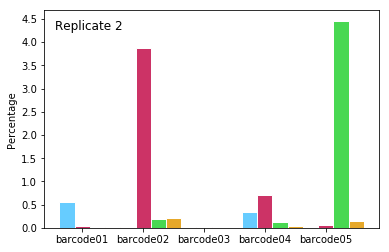

In [103]:
# now plot out the subfigure
barWidth = 0.25

# set the position
r1 = np.arange(len(Pst_reads_percentage))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]


# make the plot 
plt.bar(r1, Pst_reads_percentage, color='#66CCFF', width=barWidth, edgecolor='white', label = "$\it{P. striiformis}$")
plt.bar(r2, Zymo_reads_percentage, color='#CC3366',  width=barWidth, edgecolor='white', label = "$\it{Z. tritici}$")
plt.bar(r3, Pyre_reads_percentage, color='#48D852', width=barWidth, edgecolor='white', label = "$\it{P. tritici-repentis}$")
plt.bar(r4, Stago_reads_percentage, color='#E6A82A', width=barWidth, edgecolor='white', label = "$\it{P. nodorum}$")


plt.ylabel('Percentage')
#plt.title('Major wheat disease identification')
#plt.title('Major wheat disease identification', fontsize=20)
plt.xticks([r + barWidth for r in range(len(Pst_reads))], ['barcode01', 'barcode02', 'barcode03', 'barcode04', 'barcode05'])

# Here I used the Pyre percentage to set the max because the Pyre data is the highest in all data
plt.yticks(np.arange(0, 0.1 + max(Pyre_reads_percentage), 0.5))
#plt.legend(loc='best', prop={'size':10})
if column_name == 'run1':
    plt.text(-0.2, max(Pyre_reads_percentage)-0.2, 'Replicate 1', fontsize=12)
if column_name == 'run2':
    plt.text(-0.2, max(Pyre_reads_percentage)-0.2,'Replicate 2', fontsize=12)
if column_name == 'FAH05432':
    plt.text(-0.2, max(Pyre_reads_percentage)-0.1,'Replicate 3', fontsize=12)
if column_name == 'FAH05731':
    plt.text(-0.2,  max(Pyre_reads_percentage)-0.1, 'Replicate 4', fontsize=12)
    
plt.savefig('/home/yiheng/analysis/WGS/figures/figure2_%s.png' % column_name, bbox_inches='tight')
plt.show()

In [101]:
# finalize the summary dataframe for each subfigure and direct to the analysis folder
rghit_df = pd.DataFrame([Pst_reads, Zymo_reads, Pyre_reads, Stago_reads])
rghit_df.columns = ['barcode01','barcode02','barcode03','barcode04','barcode05']
rghit_df.index = ['Pst_reads', 'Zymo_reads', 'Pyre_reads', 'Stago_reads']
rghit_df = rghit_df.assign(Flowcell = column_name)
rghit_df.to_csv(r'/home/yiheng/analysis/WGS/%s_rghit.tab' % column_name, header=column_name, index=None, sep='\t')

In [102]:
rghit_df 

,barcode01,barcode02,barcode03,barcode04,barcode05,Flowcell
Pst_reads,0.005606,0.000000,0.000000,0.003346,0.000000,run2
Zymo_reads,0.000286,0.038686,0.000066,0.007110,0.000656,run2
Pyre_reads,0.000167,0.001846,0.000000,0.001255,0.044619,run2
Stago_reads,0.000215,0.002183,0.000000,0.000418,0.001531,run2


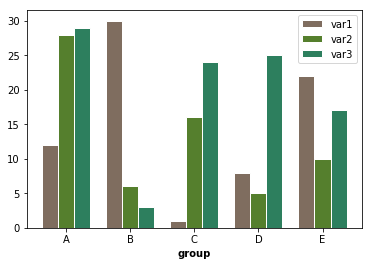

In [430]:
# Example that I followed

# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [12, 30, 1, 8, 22]
bars2 = [28, 6, 16, 5, 10]
bars3 = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='var2')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])
 
# Create legend & Show graphic
plt.legend()
plt.show()